## 付録 2.4 matplotlinb入門

In [4]:
# 日本語化ライブラリ導入
!pip install japanize-matplotlib | tail -n 1

In [5]:
# 共通事前処理

# 余分なワーニングを非表示にする
import warnings
warnings.filterwarnings('ignore')

# 必要ライブラリのimport
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# matplotlib日本語化対応
import japanize_matplotlib

# データフレーム表示用関数
from IPython.display import display

# グラフのデフォルトフォント指定
plt.rcParams["font.size"] = 14

### 1. pltによる簡易描画

#### 散布図

In [4]:
# データ準備
import seaborn as sns
df_iris = sns.load_dataset("iris") 

# 結果確認
display(df_iris.head())

# 散布図x座標用配列
xs = df_iris['sepal_length']

# 散布図y座標用配列
ys = df_iris['sepal_width']

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


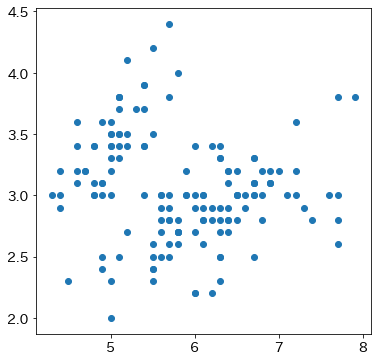

In [5]:
# サイズ設定
plt.rcParams['figure.figsize'] = (6, 6)

# 散布図
plt.scatter(xs, ys)

# 描画
plt.show()

#### 関数グラフ

In [6]:
# データ準備

# シグモイド関数の定義
def sigmoid(x, a):
    return 1/(1 + np.exp(-a*x))

# グラフ描画用x座標リスト
xp = np.linspace(-3, 3, 61)

#### 単純な例

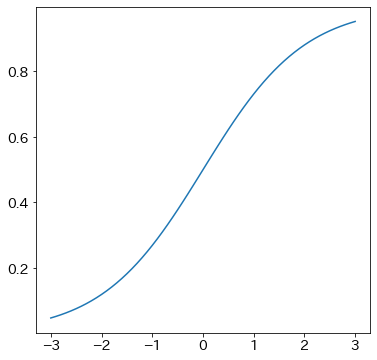

In [7]:
# サイズ設定
plt.rcParams['figure.figsize'] = (6, 6)

# グラフ描画
plt.plot(xp, sigmoid(xp, 1.0))

# 描画
plt.show()

#### 複雑な例

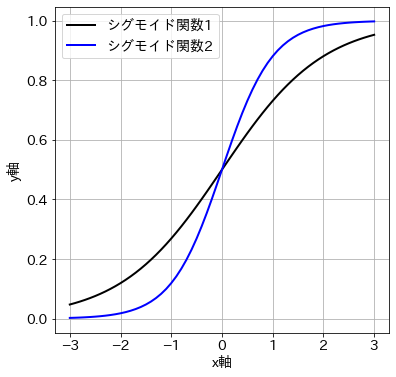

In [8]:
# サイズ設定
plt.rcParams['figure.figsize'] = (6, 6)

#ラベル付きグラフ描画 #1
plt.plot(xp, sigmoid(xp, 1.0), 
         label='シグモイド関数1', lw=2, c='k')

# ラベル付きグラフ描画 #2
plt.plot(xp, sigmoid(xp, 2.0), 
         label='シグモイド関数2', lw=2, c='b')

#方眼表示
plt.grid()

# 凡例表示
plt.legend()

# 軸表示
plt.xlabel('x軸')
plt.ylabel('y軸')

# 描画
plt.show()

### 2. fig, ax を使った複雑な描画

#### 時系列グラフ

In [23]:
#データ準備

# アイスクリーム消費量
df_ice = pd.read_excel('https://github.com/makaishi2\
/sample-data/blob/master/data/ice-sales.xlsx?raw=true', 
    sheet_name=0)

# 結果確認
display(df_ice.head())

,年月,支出
0,2015-01-01,401
1,2015-02-01,345
2,2015-03-01,480
3,2015-04-01,590
4,2015-05-01,928


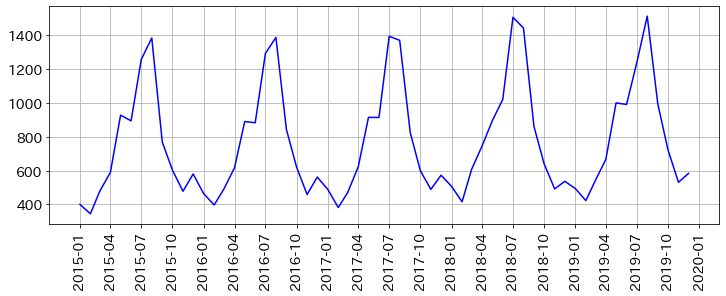

In [10]:
# axオブジェクトの取得
# サイズ指定も同時に行う
fig, ax = plt.subplots(figsize=(12, 4))

# グラフ描画
ax.plot(df_ice['年月'], df_ice['支出'], c='b')

# 日付設定用ライブラリ
import matplotlib.dates as mdates

# 3か月区切りの目盛にする
days = mdates.MonthLocator(bymonth=range(1,13,3))
ax.xaxis.set_major_locator(days)

# x軸ラベルを90度回転
ax.tick_params(axis='x', rotation=90)

# 方眼表示
ax.grid()

# 描画
plt.show()

### 3. subplotを使った複数グラフの同時描画

#### イメージの複数同時表示

In [1]:
# データ準備

# 手書き数字データ
# 時間がかかるので注意して下さい
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1,)

# イメージデータ
image = mnist.data
# 正解データ
label = mnist.target

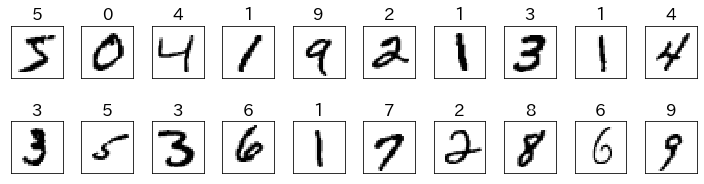

In [8]:
# サイズ指定
plt.figure(figsize=(10, 3))

# 20個のイメージを表示
for i in range(20): 
    
    # i 番目のaxオブジェクト取得
    ax = plt.subplot(2, 10, i+1)
    
    # i番目のイメージデータ取得し28x28に変換
    img = image[i].reshape(28,28)
    
    # imgをイメージ表示
    ax.imshow(img, cmap='gray_r')
    
    # 正解データをタイトル表示
    ax.set_title(label[i])
    
    # x, y目盛非表示
    ax.set_xticks([])
    ax.set_yticks([])
    
# 隣接オブジェクトとぶつからないようにする
plt.tight_layout()

# 表示
plt.show() 

### 4. データフレームからのグラフ表示

#### ヒストグラム表示

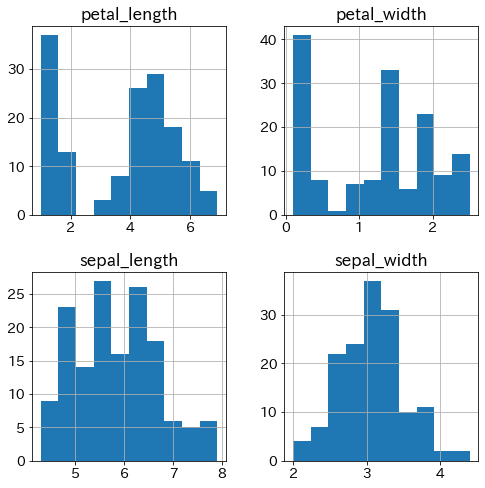

In [22]:
# ヒストグラム表示

# サイズ設定
plt.rcParams['figure.figsize'] = (8, 8)

# ヒストグラム
df_iris.hist()

# 表示
plt.show()

#### value_countsの結果を棒グラフ表示

In [19]:
# データ準備

# df_iris['sepal_width']の値別個数を集計し、上位5件を取得
counts_ser = df_iris['sepal_width'].value_counts().iloc[:5]

# 結果確認
print(counts_ser)

3.0    26
2.8    14
3.2    13
3.4    12
3.1    11
Name: sepal_width, dtype: int64


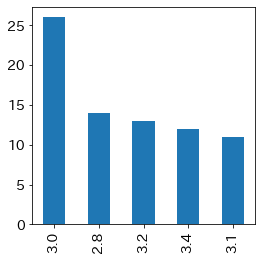

In [21]:
# value_countsの結果を棒グラフ表示

# サイズ設定
plt.rcParams['figure.figsize'] = (4, 4)

# Series配列のデータを棒グラフ表示
counts_ser.plot(kind='bar')

# 表示
plt.show()